In [1]:
import torch 
from torch.utils import data 
from torch.autograd import Variable 
import torchvision
from torchvision.datasets import mnist
import matplotlib.pyplot as plt
from datascience import Table
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
import json
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

In [46]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(6,24) 
        self.fc2 = nn.Linear(24,12)
        self.fc3 = nn.Linear(12,4)
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x
mnet=Net()
mnet.load_state_dict(torch.load('DNNmodel.pth'))

In [54]:
testing = pd.read_csv('Frost_data.csv')
Test=Table.from_df(testing)
Test

time,volume,min_price,max_price,avg_price,median_price,warframe,available,ducats,release,hot,date,weekend
2019/1/19,50,260,300,280,281,Frost,1,175,0,2,19,1
2019/1/20,53,256,300,278,280,Frost,1,175,0,2,20,1
2019/1/21,27,272,294,283,286.5,Frost,1,175,0,2,21,0
2019/1/22,48,140,300,220,255,Frost,1,175,0,2,22,0
2019/1/23,91,120,220,170,160,Frost,2,175,1,2,23,0
2019/1/24,52,129,200,164.5,170,Frost,2,175,1,2,24,0
2019/1/25,29,148,200,174,174,Frost,2,175,1,2,25,0
2019/1/26,22,145,176,160.5,160,Frost,2,175,1,2,26,1
2019/1/27,29,150,200,175,179,Frost,2,175,1,2,27,1
2019/1/28,36,150,220,185,176,Frost,2,175,1,2,28,0


In [55]:
features=[]
for i in range(89):
    feature1=[]
    feature1.append(Test.row(i)[7])
    feature1.append(Test.row(i)[8]/100)
    feature1.append(Test.row(i)[9])
    feature1.append(Test.row(i)[10])
    feature1.append(Test.row(i)[11]/10)
    feature1.append(Test.row(i)[12])
    features.append(feature1)
features[:5]

[[1, 1.75, 0, 2, 1.9, 1.0],
 [1, 1.75, 0, 2, 2.0, 1.0],
 [1, 1.75, 0, 2, 2.1, 0.0],
 [1, 1.75, 0, 2, 2.2, 0.0],
 [2, 1.75, 1, 2, 2.3, 0.0]]

In [56]:
labels=[]
for i in range(89):
    label=[]
    label.append(Test.row(i)[1])
    label.append(Test.row(i)[2])
    label.append(Test.row(i)[3])
    label.append(Test.row(i)[4])
    labels.append(label)
labels[5][1]

129

In [57]:
prediction=np.array([])
real=np.array([])
j=2
for i in range(89):
    k=i
    state=features[k]
    innput=Variable(torch.FloatTensor(state))
    output=mnet(innput).detach().numpy()
    prediction=np.append(prediction,output[j])
    real=np.append(real,labels[k][j])
prediction[:20]

array([339.49957275, 339.81152344, 340.99557495, 341.30718994,
       231.21572876, 230.07504272, 228.93435669, 224.8089447 ,
       223.66828918, 225.5123291 , 224.37162781, 223.23095703,
       222.09028625, 160.29963684, 157.84924316, 156.75541687,
       157.01820374, 155.9243927 , 154.83059692, 153.73681641])

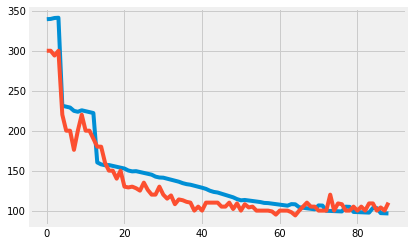

In [58]:
plt.plot(prediction)
plt.plot(real)